DEFAULT CODING

In [1]:
#importing the Libraries#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reading the Dataset#
dataset=pd.read_csv('Social_Network_Ads.csv')

In [3]:
#what saved in this file#
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#create dummy data set. #drop a column#
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
#what saved in this file#
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [6]:
#catogorical data convert to numerical data#
dataset=dataset.astype(int)

In [7]:
#what saved in this file#
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [8]:
dataset=dataset.drop("User ID",axis=1)

In [9]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [10]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [11]:
#show all columns in dataset#
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [12]:
#independent variable means input.  #split input variables. #dataset assigned to independent variable#
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]

In [13]:
#what saved in this file#
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [14]:
#dependent variable means output.  #split output variables. #dataset assigned to dependent variable#
dependent=dataset[['Purchased']]

In [15]:
#what saved in this file#
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [16]:
#machine learning algorithms provider is sklearn #split train set and test set#
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(independent, dependent,test_size=0.30,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Model creation#
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'kernel':['rbf','poly','sigmoid','linear'],
              'C':[19,100,1000,2000,3000],'gamma':['auto','scale'] }
grid=GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3,n_jobs=-1,scoring='f1_weighted')

#fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\anandha rishi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [19, 100, 1000, 2000, 3000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='f1_weighted', verbose=3)

In [19]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
y_pred = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

In [20]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,y_pred,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}: 0.9161458333333334


In [21]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[75  4]
 [ 6 35]]


In [22]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.90      0.85      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])

0.9617165791911083

In [24]:
table=pd.DataFrame.from_dict(re)

In [25]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034665,0.007962,0.032615,1.174949e-02,19,auto,rbf,"{'C': 19, 'gamma': 'auto', 'kernel': 'rbf'}",0.874254,0.875644,0.841398,0.929144,0.927778,0.889644,0.033985,3
1,0.043599,0.011303,0.029338,1.283422e-02,19,auto,poly,"{'C': 19, 'gamma': 'auto', 'kernel': 'poly'}",0.833024,0.799537,0.737557,0.928571,0.907658,0.841269,0.070136,11
2,0.024912,0.008672,0.019279,7.092640e-03,19,auto,sigmoid,"{'C': 19, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.769053,0.714286,0.610390,0.694864,0.759910,0.709701,0.056829,40
3,0.037505,0.007655,0.016037,8.134873e-04,19,auto,linear,"{'C': 19, 'gamma': 'auto', 'kernel': 'linear'}",0.835985,0.782971,0.644599,0.927778,0.890114,0.816289,0.098849,21
4,0.023024,0.008778,0.017654,7.484750e-03,19,scale,rbf,"{'C': 19, 'gamma': 'scale', 'kernel': 'rbf'}",0.874254,0.875644,0.841398,0.929144,0.927778,0.889644,0.033985,3
5,0.034379,0.006251,0.015626,1.403231e-06,19,scale,poly,"{'C': 19, 'gamma': 'scale', 'kernel': 'poly'}",0.833024,0.799537,0.737557,0.928571,0.907658,0.841269,0.070136,11
6,0.021876,0.007654,0.015309,9.388736e-03,19,scale,sigmoid,"{'C': 19, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.769053,0.714286,0.632414,0.694864,0.785714,0.719266,0.054877,39
7,0.043605,0.011113,0.014160,2.940441e-03,19,scale,linear,"{'C': 19, 'gamma': 'scale', 'kernel': 'linear'}",0.835985,0.782971,0.644599,0.927778,0.890114,0.816289,0.098849,21
8,0.040629,0.018750,0.015625,2.923910e-06,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.855314,0.892857,0.859435,0.929144,0.928571,0.893064,0.031996,1
9,0.091089,0.011073,0.015631,3.395268e-06,100,auto,poly,"{'C': 100, 'gamma': 'auto', 'kernel': 'poly'}",0.833024,0.799537,0.715601,0.928571,0.907658,0.836878,0.076857,14


In [26]:
age_input=float(input("Age."))
salary_input=float(input("salary:"))
sex_male_input=int(input("Sex Male 0 or 1:"))

Age. 20
salary: 55
Sex Male 0 or 1: 1


In [27]:
grid.predict([[age_input,salary_input,sex_male_input]])

array([1])

COPY&PASTE FOR GITHUB OPTIMIZING

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('Social_Network_Ads.csv')
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
dataset=dataset.drop("User ID",axis=1)
dataset["Purchased"].value_counts()
dataset.columns
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dependent=dataset[['Purchased']]

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(independent, dependent,test_size=0.30,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'kernel':['rbf','poly','sigmoid','linear'],
              'C':[19,100,1000,2000,3000],'gamma':['auto','scale'] }
grid=GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3,n_jobs=-1,scoring='f1_weighted')
#fitting the model for grid search
grid.fit(X_train, y_train)

re=grid.cv_results_
#print(re)
y_pred = grid.predict(X_test) 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,y_pred,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

print("The confusion Matrix:\n",cm)

print(clf_report)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])

table=pd.DataFrame.from_dict(re)

table

age_input=float(input("Age."))
salary_input=float(input("salary:"))
sex_male_input=int(input("Sex Male 0 or 1:"))

grid.predict([[age_input,salary_input,sex_male_input]])

#This is the problem statement for this problem statement i have written this code
# is there any optimizing way to get same output for this problem statement?

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\anandha rishi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The f1_macro value for best parameter {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}: 0.9161458333333334
The confusion Matrix:
 [[75  4]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.90      0.85      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



Age. 20
salary: 55
Sex Male 0 or 1: 1


array([1])

OPTIMIZED CODE 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The f1_macro value for best parameter {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}: 0.9161458333333334
The confusion Matrix:
 [[75  4]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.90      0.85      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



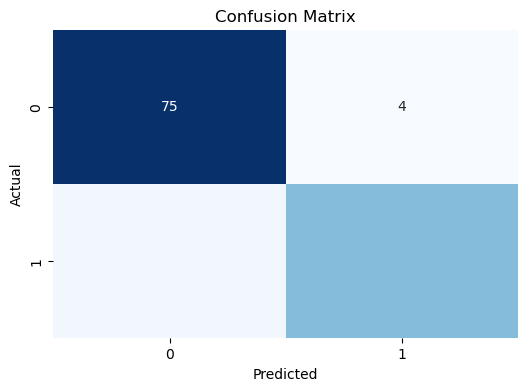

ROC AUC Score: 0.9617165791911083


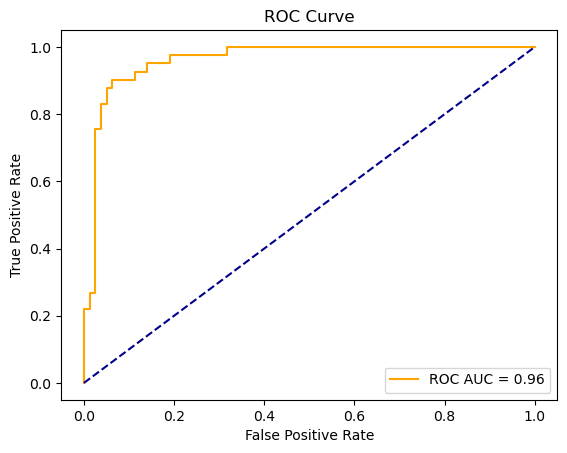

Age:  20
Salary:  55
Sex Male (0 or 1):  1


Prediction for the input data: [0]


C:\Users\anandha rishi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

# Load dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.get_dummies(dataset, drop_first=True)
dataset = dataset.drop("User ID", axis=1)

# Split data into independent and dependent variables
independent = dataset[['Age', 'EstimatedSalary', 'Gender_Male']]
dependent = dataset['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVC Grid Search
param_grid = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
              'C': [19, 100, 1000, 2000, 3000],
              'gamma': ['auto', 'scale']}
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3, n_jobs=-1, scoring='f1_weighted')
grid.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='weighted')

print("The f1_macro value for best parameter {}:".format(grid.best_params_), f1_macro)
print("The confusion Matrix:\n", cm)
print(clf_report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC Score and Curve
roc_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='orange', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Predict for a new input
def predict_new(age_input, salary_input, sex_male_input):
    scaled_input = sc.transform([[age_input, salary_input, sex_male_input]])
    return grid.predict(scaled_input)

age_input = float(input("Age: "))
salary_input = float(input("Salary: "))
sex_male_input = int(input("Sex Male (0 or 1): "))
print("Prediction for the input data:", predict_new(age_input, salary_input, sex_male_input))